In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from tqdm import tqdm

In [25]:
class MyRandom():
    
    def __init__(self, seed = 15, method='simple'):
        
        self.r = seed
        self.method = method
        
        if method == 'simple':
            self.a = 57
            self.c = 1
            self.M = 265
        elif method == 'drand48':
            self.a = int('5DEECE66D',16)
            self.c = int('B',16)
            self.M = 2**48
           # print(self.a)     
        else:
            print('Metodo no reconocido')
        
    def Random(self):
        
        r = (self.a*self.r + self.c)%self.M
        self.r = r
        
        return r/float(self.M)
    
    def TestMethod(self, Npoints, moment, seed_ = 32, method_ = 'simple'):
        
        
        rand = MyRandom(seed = seed_, method=method_)
        
        array = np.zeros(Npoints)
        
        for i in range(Npoints):
            array[i] = rand.Random()
        
        return np.sqrt(Npoints)*np.abs(  np.mean(array**moment) - 1/(1+moment)  )

In [26]:
rand = MyRandom(method='drand48')

In [27]:
def FillPoints(seed_, method_, Npoints):
    
    # El objeto MyRandom - generador de numeros aleatroios
    
    rand = MyRandom(seed = seed_, method=method_)
    
    points = np.zeros(Npoints)
    
    for i in tqdm(range(Npoints)):
        points[i] = rand.Random()
        
    return points

In [28]:
Npoints = 5000
Nsimple = FillPoints(163, 'simple', Npoints)
Ndrand48 = FillPoints(1565, 'drand48', Npoints)

100%|██████████| 5000/5000 [00:00<00:00, 315380.17it/s]


In [29]:
indices = np.arange(Npoints)
Even = (indices%2) == 0
print(Even)

[ True False  True ... False  True False]


In [30]:
print(Nsimple[:10])

[0.06415094 0.66037736 0.64528302 0.78490566 0.74339623 0.37735849
 0.51320755 0.25660377 0.63018868 0.9245283 ]


In [31]:
print(Nsimple[Even])
print(Nsimple[~Even])

[0.06415094 0.64528302 0.74339623 ... 0.64528302 0.74339623 0.51320755]
[0.66037736 0.78490566 0.37735849 ... 0.78490566 0.37735849 0.25660377]


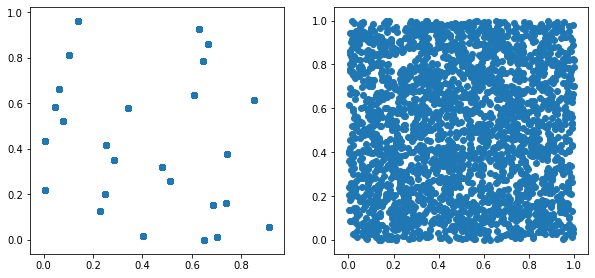

In [32]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

ax1.scatter(Nsimple[Even],Nsimple[~Even])
ax2.scatter(Ndrand48[Even],Ndrand48[~Even])

(array([865., 480., 673., 385., 384., 289., 866., 385., 385., 288.]),
 array([0.        , 0.09622642, 0.19245283, 0.28867925, 0.38490566,
        0.48113208, 0.57735849, 0.67358491, 0.76981132, 0.86603774,
        0.96226415]),
 <a list of 10 Patch objects>)

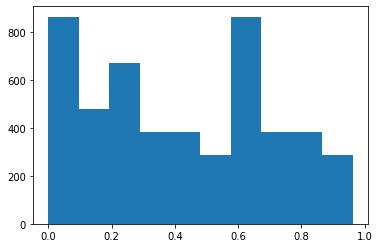

In [34]:
plt.hist(Nsimple)

In [37]:
#[1,2,3,4] 
#C(1) = (1*2 + 2*3 + 3*4)/4
#C(2) = (1*3 + 2*4)/4
#C(3) = (1*4)/4

In [35]:
# Calculando los momentos de los puntos
rand = MyRandom(seed = '565', method='simple')

momentos = []

points =  np.linspace(1,1e5, 10)
print(points)

for k in tqdm(range(10,20)):
    
    test = []
    for i in range(len(points)):
        
        test.append( rand.TestMethod( int(points[i]) , k, method_='simple'  )  )
        
    momentos.append(test)

  0%|          | 0/10 [00:00<?, ?it/s]

[1.0000e+00 1.1112e+04 2.2223e+04 3.3334e+04 4.4445e+04 5.5556e+04
 6.6667e+04 7.7778e+04 8.8889e+04 1.0000e+05]


100%|██████████| 10/10 [00:06<00:00,  1.65it/s]


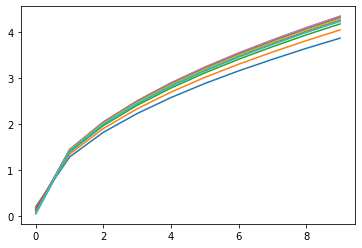

In [36]:
for i in range(len(momentos)):
    plt.plot(momentos[i])